In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

pd.set_option("expand_frame_repr", False)
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # 数值不显示科学计数法，保留两位小数
np.set_printoptions(suppress=True)


In [4]:
data = pd.read_csv("./data/1_train1.csv")
data = data.fillna(0)
del data[data.columns[0]]
X = data.iloc[:, :-1]
y = data['y']

from sklearn.model_selection import train_test_split
random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_seed, stratify=y)

from imblearn.over_sampling import SMOTE, BorderlineSMOTE
oversample = BorderlineSMOTE()
X_over, y_over = oversample.fit_resample(X_train, y_train)
y_over.value_counts()

0    4083
1    4083
Name: y, dtype: int64

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 0.01, 0.001, 1, 10, 100]
}
model = LogisticRegression(random_state=random_seed)
gs = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1_weighted', cv=10)
gs.fit(X_over, y_over)
gs.best_score_, gs.best_params_

(0.7257596957472586, {'C': 100})

In [17]:
from sklearn.metrics import f1_score
model = LogisticRegression(C=100)
model.fit(X_over, y_over)
y_pred = model.predict(X_test)
print("LR f1_score: %.4f%%" %(f1_score(y_test, y_pred) * 100))

LR f1_score: 39.6752%


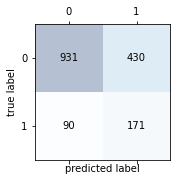

In [18]:
from sklearn.metrics import confusion_matrix

confmt = confusion_matrix(y_true=y_test, y_pred=y_pred)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmt, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmt.shape[0]):
    for j in range(confmt.shape[1]):
        ax.text(x=j, y=i, s=confmt[i, j], va='center', ha='center')
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.show()